#CNN-only model vs CNN+LSTM model

In [1]:
from google.colab import files
uploaded = files.upload()

Saving resampled_abnormal.npy to resampled_abnormal.npy
Saving resampled_normal.npy to resampled_normal.npy


In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# 🔹 데이터 로딩
X_normal = np.load('resampled_normal.npy')
X_abnormal = np.load('resampled_abnormal.npy')

y_normal = np.zeros(len(X_normal), dtype=int)
y_abnormal = np.ones(len(X_abnormal), dtype=int)

X = np.concatenate([X_normal, X_abnormal], axis=0)
y = np.concatenate([y_normal, y_abnormal], axis=0)
X = X.reshape(-1, 100, 1)

# 🔹 K-Fold 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnn_accuracies = []
cnn_lstm_accuracies = []

fold = 1
for train_idx, val_idx in kf.split(X, y):
    print(f"\n📂 Fold {fold}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    ### 📌 [1] CNN-only 모델 ###
    cnn_model = Sequential([
        Conv1D(32, kernel_size=5, activation='relu', input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=0)
    cnn_pred = (cnn_model.predict(X_val) > 0.5).astype("int32").flatten()
    acc_cnn = accuracy_score(y_val, cnn_pred)
    print(f"✅ CNN Accuracy: {acc_cnn:.4f}")
    cnn_accuracies.append(acc_cnn)

    ### 📌 [2] CNN + LSTM 모델 ###
    input_layer = Input(shape=(100, 1))
    x = Conv1D(32, kernel_size=5, activation='relu')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation='sigmoid')(x)

    cnn_lstm_model = Model(inputs=input_layer, outputs=output)
    cnn_lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    cnn_lstm_model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=0)
    lstm_pred = (cnn_lstm_model.predict(X_val) > 0.5).astype("int32").flatten()
    acc_lstm = accuracy_score(y_val, lstm_pred)
    print(f"✅ CNN+LSTM Accuracy: {acc_lstm:.4f}")
    cnn_lstm_accuracies.append(acc_lstm)

    fold += 1

# 🔹 평균 비교 출력
print("\n📊 5-Fold 평균 정확도 비교")
print(f"▶ CNN-only 평균 정확도:     {np.mean(cnn_accuracies):.4f}")
print(f"▶ CNN+LSTM 평균 정확도:     {np.mean(cnn_lstm_accuracies):.4f}")



📂 Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ CNN Accuracy: 0.9852
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
✅ CNN+LSTM Accuracy: 0.9882

📂 Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ CNN Accuracy: 0.9845
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ CNN+LSTM Accuracy: 0.9867

📂 Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ CNN Accuracy: 0.9867
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ CNN+LSTM Accuracy: 0.9867

📂 Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ CNN Accuracy: 0.9815
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ CNN+LSTM Accuracy: 0.9860

📂 Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ CNN Accuracy: 0.9830
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
✅ CNN+LSTM Accuracy: 0.9837

📊 5-Fold 평균 정확도 비교
▶ CNN-only 평균 정확도:     0.9842
▶ CNN+LSTM 평균 정확도:     0.9863


# 비교 결과 시각화

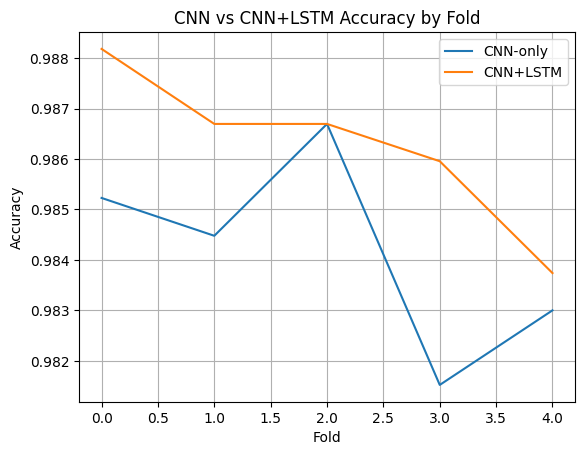

In [3]:
import matplotlib.pyplot as plt

plt.plot(cnn_accuracies, label="CNN-only")
plt.plot(cnn_lstm_accuracies, label="CNN+LSTM")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("CNN vs CNN+LSTM Accuracy by Fold")
plt.legend()
plt.grid()
plt.show()

# 결과 요약 및 해석

| Fold   | CNN-only Accuracy | CNN+LSTM Accuracy |
| ------ | ----------------- | ----------------- |
| 1      | 0.9852            | 0.9882 ✅          |
| 2      | 0.9845            | 0.9867 ✅          |
| 3      | 0.9867            | 0.9867            |
| 4      | 0.9815            | 0.9860 ✅          |
| 5      | 0.9830            | 0.9837 ✅          |
| **평균** | **0.9842**        | **0.9863** ✅      |


| 항목     | 해석                                             |
| ------ | ---------------------------------------------- |
| 성능 차이  | CNN+LSTM이 전반적으로 **조금 더 정확도 높음** (약 +0.21%)     |
| 신뢰도    | 모든 Fold에서 성능이 비슷하거나 더 좋음 → 안정적 개선              |
| 구조적 이점 | CNN이 국소 패턴을, LSTM이 시간 흐름을 학습해서 **서로 보완 효과** 발생 |
